# **Automatiser les rapports de ventes avec SQL**
**Problématique métier**
 Une entreprise souhaite produire un rapport détaillant les ventes
 totales par produit pour le dernier trimestre.
# **Objectif**
Utiliser SQL pour extraire, filtrer et agréger les données nécessaires.

**CHEMA DE LA BASE DE DONNEES**

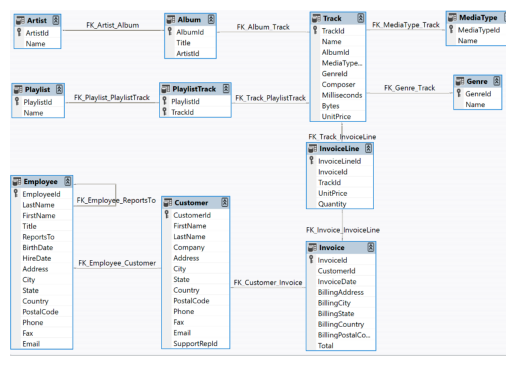

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Charger l'image
image = mpimg.imread('img.PNG')

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Supprimer les axes
plt.show()


# **IMPORTATION DE SQLITE3**

In [36]:
import sqlite3


# **CLASS ET MATHODES**

In [117]:
#Fonction
class afficher:
    def sent_allnb(self, el, vars):
        print(f"{vars} : {len(el)}")
    def sent_all(self, element, mon_dict= dict()):
        v = ""
        for el in element:
            for index, cle in enumerate(mon_dict):
                if index == len(mon_dict) - 1:
                    v += f" ;{cle} : {el[mon_dict[cle]]} \n"
                else:
                    if index == 0:
                        v += f"{cle} : {el[mon_dict[cle]]}"
                    else:
                        v += f"    ;{cle} : {el[mon_dict[cle]]}    "
        print(v)
            # print(f"Index: {index}, Clé: {cle}, Valeur: {mon_dictionnaire[cle]}")
            # print(f"ID:{el[0]} ;Client : {el[1]} {el[2]}; Pays : {el[3]}")
        
            # for el in element:
            #     v += f"{cle}:{el[index]}"
        
     # print(f"ID:{el[0]} ;Client : {el[1]} {el[2]}; Pays : {el[3]}")
        

In [72]:
# class pour se connecter à une base de données SQLite
class Database:
    def __init__(self, db_path):
        """Initialise la connexion à la base de données SQLite."""
        self.db_path = db_path
        self.conn = None
        self.cursor = None

    def connect(self):
        """Établit la connexion à la base de données."""
        self.conn = sqlite3.connect(self.db_path)
        self.cursor = self.conn.cursor()
        

    def execute_query(self, query, params=None):
        """Exécute une requête (SELECT, INSERT, UPDATE, etc.)."""
        if self.conn is None:
            self.connect()
        try:
            if params:
                self.cursor.execute(query, params)
            else:
                self.cursor.execute(query)
            self.conn.commit()
            return self.cursor.fetchall()
        except sqlite3.Error as e:
            print(f"Erreur SQLite : {e}")
            return None
        finally:
            self.close()
            
    #Récupère la position d'une colonne dans une table SQLite.
    def get_icol(self, table_name, column_name=[]):
        result= dict()
        if self.conn is None:
            self.connect()
        try:
            if len(column_name) == 0:
                print("Aucune colonne spécifiée.")
                return None
            else:
                self.cursor.execute(f"PRAGMA table_info('{table_name}')")
                columns_info = self.cursor.fetchall()
                for col in column_name:  
                    if not isinstance(col, str):
                        print(f"Le nom de la colonne '{col}' doit être une chaîne de caractères.")
                        return None
                    
                    for index, column in enumerate(columns_info):
                        # column est un tuple: (cid, name, type, notnull, dflt_value, pk)
                        if column[1] == col:  # column[1] est le nom de la colonne
                            result[col]= index
                    if not result:
                        print(f"Colonne '{col}' non trouvée dans la table '{table_name}'.")
                        return None
                return result
        except sqlite3.Error as e:
            print(f"Erreur SQLite: {e}")
            return None
        finally:
            self.close()

    def close(self):
        """Ferme la connexion proprement."""
        if self.cursor:
            self.cursor.close()
        if self.conn:
            self.conn.close()
            self.conn = None
            self.cursor = None
    def test_conn(self):
        """Teste la connexion à la base de données."""
        try:
            self.connect()
            print("Connexion réussie à la base de données.")
        except sqlite3.Error as e:
            print(f"Erreur de connexion : {e}")
        finally:
            self.close()

In [73]:
db = Database("Chinook_Sqlite.sqlite")


In [118]:
view = afficher()

In [82]:
tbn = db.get_icol("Customer", ["Country", "FirstName", "LastName", "CustomerId"])
tbn

{'Country': 7, 'FirstName': 1, 'LastName': 2, 'CustomerId': 0}

In [119]:
view.sent_all(db.execute_query("SELECT * FROM Customer"), tbn)

CustomerId : 1    ;FirstName : Luís        ;LastName : Gonçalves     ;Country : Brazil 
CustomerId : 2    ;FirstName : Leonie        ;LastName : Köhler     ;Country : Germany 
CustomerId : 3    ;FirstName : François        ;LastName : Tremblay     ;Country : Canada 
CustomerId : 4    ;FirstName : Bjørn        ;LastName : Hansen     ;Country : Norway 
CustomerId : 5    ;FirstName : František        ;LastName : Wichterlová     ;Country : Czech Republic 
CustomerId : 6    ;FirstName : Helena        ;LastName : Holý     ;Country : Czech Republic 
CustomerId : 7    ;FirstName : Astrid        ;LastName : Gruber     ;Country : Austria 
CustomerId : 8    ;FirstName : Daan        ;LastName : Peeters     ;Country : Belgium 
CustomerId : 9    ;FirstName : Kara        ;LastName : Nielsen     ;Country : Denmark 
CustomerId : 10    ;FirstName : Eduardo        ;LastName : Martins     ;Country : Brazil 
CustomerId : 11    ;FirstName : Alexandre        ;LastName : Rocha     ;Country : Brazil 
CustomerI

# **Requêtes de base**
**1.**
    **Clients non américains : Requête affichant les**
    **Clients (leurs noms complets, ID client et pays) qui ne sont pas aux**
    **États-Unis**

In [ ]:
#nombre total de clients
db_c = db.execute_query("SELECT * FROM customer")
view.sent_allnb(db_c, "Nombre de client total")
tbn = db.get_icol("Customer", ["CustomerId", "FirstName", "LastName", "Country"])
tbn


Nombre de client total : 59


{'CustomerId': 0, 'FirstName': 1, 'LastName': 2, 'Country': 7}

In [120]:
view.sent_all(db_c, tbn)

CustomerId : 1    ;FirstName : Luís        ;LastName : Gonçalves     ;Country : Brazil 
CustomerId : 2    ;FirstName : Leonie        ;LastName : Köhler     ;Country : Germany 
CustomerId : 3    ;FirstName : François        ;LastName : Tremblay     ;Country : Canada 
CustomerId : 4    ;FirstName : Bjørn        ;LastName : Hansen     ;Country : Norway 
CustomerId : 5    ;FirstName : František        ;LastName : Wichterlová     ;Country : Czech Republic 
CustomerId : 6    ;FirstName : Helena        ;LastName : Holý     ;Country : Czech Republic 
CustomerId : 7    ;FirstName : Astrid        ;LastName : Gruber     ;Country : Austria 
CustomerId : 8    ;FirstName : Daan        ;LastName : Peeters     ;Country : Belgium 
CustomerId : 9    ;FirstName : Kara        ;LastName : Nielsen     ;Country : Denmark 
CustomerId : 10    ;FirstName : Eduardo        ;LastName : Martins     ;Country : Brazil 
CustomerId : 11    ;FirstName : Alexandre        ;LastName : Rocha     ;Country : Brazil 
CustomerI

**2.  Clients brésiliens : Requête affichant uniquement
les Clients provenant du Brésil.**

In [123]:
db_brazil = db.execute_query("SELECT * FROM customer WHERE country IN('Brazil')")
view.sent_allnb(db_brazil, "Nombre de client Brésilliens")
tbn = db.get_icol("Customer", ["CustomerId", "FirstName", "LastName", "Country"])
view.sent_all(db_brazil, tbn)


Nombre de client Brésilliens : 5
CustomerId : 1    ;FirstName : Luís        ;LastName : Gonçalves     ;Country : Brazil 
CustomerId : 10    ;FirstName : Eduardo        ;LastName : Martins     ;Country : Brazil 
CustomerId : 11    ;FirstName : Alexandre        ;LastName : Rocha     ;Country : Brazil 
CustomerId : 12    ;FirstName : Roberto        ;LastName : Almeida     ;Country : Brazil 
CustomerId : 13    ;FirstName : Fernanda        ;LastName : Ramos     ;Country : Brazil 



**3. Factures des clients brésiliens : Requête affichant les factures des clients qui sont du Brésil.**

In [124]:
db_fac_bra = db.execute_query("SELECT * FROM invoice WHERE BillingCountry IN('Brazil')")
view.sent_allnb(db_fac_bra, "Nombre de factures Brésilliens")
tbn = db.get_icol("Invoice", ["InvoiceId", "CustomerId", "BillingCountry", "Total"])    
view.sent_all(db_fac_bra, tbn)

Nombre de factures Brésilliens : 35
InvoiceId : 25    ;CustomerId : 10        ;BillingCountry : Brazil     ;Total : 8.91 
InvoiceId : 34    ;CustomerId : 12        ;BillingCountry : Brazil     ;Total : 0.99 
InvoiceId : 35    ;CustomerId : 13        ;BillingCountry : Brazil     ;Total : 1.98 
InvoiceId : 57    ;CustomerId : 11        ;BillingCountry : Brazil     ;Total : 1.98 
InvoiceId : 58    ;CustomerId : 13        ;BillingCountry : Brazil     ;Total : 3.96 
InvoiceId : 68    ;CustomerId : 11        ;BillingCountry : Brazil     ;Total : 13.86 
InvoiceId : 80    ;CustomerId : 13        ;BillingCountry : Brazil     ;Total : 5.94 
InvoiceId : 98    ;CustomerId : 1        ;BillingCountry : Brazil     ;Total : 3.98 
InvoiceId : 121    ;CustomerId : 1        ;BillingCountry : Brazil     ;Total : 3.96 
InvoiceId : 123    ;CustomerId : 11        ;BillingCountry : Brazil     ;Total : 8.91 
InvoiceId : 132    ;CustomerId : 13        ;BillingCountry : Brazil     ;Total : 0.99 
InvoiceId : 143 

**4. Agents de vente : Requête affichant uniquement
les employés qui sont des Agents de Vente**

In [126]:
db_agents = db.execute_query("SELECT * FROM employee WHERE Title LIKE '%Sales%'")
view.sent_allnb(db_agents, "Nombre d'agents de ventes")
tbn = db.get_icol("Employee", ["EmployeeId", "FirstName", "LastName", "Title"])
view.sent_all(db_agents, tbn)


Nombre d'agents de ventes : 4
EmployeeId : 2    ;FirstName : Nancy        ;LastName : Edwards     ;Title : Sales Manager 
EmployeeId : 3    ;FirstName : Jane        ;LastName : Peacock     ;Title : Sales Support Agent 
EmployeeId : 4    ;FirstName : Margaret        ;LastName : Park     ;Title : Sales Support Agent 
EmployeeId : 5    ;FirstName : Steve        ;LastName : Johnson     ;Title : Sales Support Agent 



**5. Pays uniques dans les factures : Requête affichant
une liste unique des pays de facturation présents dans la table Invoice.**

In [128]:
db_country = db.execute_query("SELECT  DISTINCT(BillingCountry) FROM invoice")
view.sent_allnb(db_country, "Pays distincts")
for el in db_country:
    print(f"Pays : {el[0]}")

Pays distincts : 24
Pays : Germany
Pays : Norway
Pays : Belgium
Pays : Canada
Pays : USA
Pays : France
Pays : Ireland
Pays : United Kingdom
Pays : Australia
Pays : Chile
Pays : India
Pays : Brazil
Pays : Portugal
Pays : Netherlands
Pays : Spain
Pays : Sweden
Pays : Czech Republic
Pays : Finland
Pays : Denmark
Pays : Italy
Pays : Poland
Pays : Austria
Pays : Hungary
Pays : Argentina


**6. Factures par agent de vente : Fournissez une requête affichant les
  factures associées à chaque agent de vente.
  Le tableau résultant doit inclure le nom complet de l'agent de
  vente.**

In [129]:
db_agent_fac = db.execute_query("SELECT * FROM invoice, customer, employee WHERE invoice.CustomerId = customer.CustomerId AND customer.SupportRepId = employee.EmployeeId ORDER BY InvoiceId ASC")
view.sent_allnb(db_agent_fac, "Nombre de factures par agent de vente")
tbn = db.get_icol("Invoice", ["InvoiceId", "BillingCity", "BillingAddress", "LastName", "FirstName"])
view.sent_all(db_agent_fac, tbn)

Nombre de factures par agent de vente : 412
InvoiceId : 1    ;BillingCity : Stuttgart     ;BillingAddress : Theodor-Heuss-Straße 34 
InvoiceId : 2    ;BillingCity : Oslo     ;BillingAddress : Ullevålsveien 14 
InvoiceId : 3    ;BillingCity : Brussels     ;BillingAddress : Grétrystraat 63 
InvoiceId : 4    ;BillingCity : Edmonton     ;BillingAddress : 8210 111 ST NW 
InvoiceId : 5    ;BillingCity : Boston     ;BillingAddress : 69 Salem Street 
InvoiceId : 6    ;BillingCity : Frankfurt     ;BillingAddress : Berger Straße 10 
InvoiceId : 7    ;BillingCity : Berlin     ;BillingAddress : Barbarossastraße 19 
InvoiceId : 8    ;BillingCity : Paris     ;BillingAddress : 8, Rue Hanovre 
InvoiceId : 9    ;BillingCity : Bordeaux     ;BillingAddress : 9, Place Louis Barthou 
InvoiceId : 10    ;BillingCity : Dublin     ;BillingAddress : 3 Chatham Street 
InvoiceId : 11    ;BillingCity : London     ;BillingAddress : 202 Hoxton Street 
InvoiceId : 12    ;BillingCity : Stuttgart     ;BillingAddress : 

**7. Détails des factures : Fournissez une requête affichant le total de
chaque facture, le nom du client, le pays et le nom de l'agent de vente**

In [132]:
db_fac_total = db.execute_query("SELECT * FROM invoice, customer, employee WHERE invoice.CustomerId = customer.CustomerId AND customer.SupportRepId = employee.EmployeeId ORDER BY Total ASC")
view.sent_allnb(db_fac_total, "Total par facture")
tbn = db.get_icol("Invoice", ["InvoiceId", "BillingCity", "BillingAddress", "LastName", "FirstName", "Total"])
view.sent_all(db_fac_total, tbn)


Total par facture : 412
InvoiceId : 6    ;BillingCity : Frankfurt        ;BillingAddress : Berger Straße 10     ;Total : 0.99 
InvoiceId : 13    ;BillingCity : Mountain View        ;BillingAddress : 1600 Amphitheatre Parkway     ;Total : 0.99 
InvoiceId : 20    ;BillingCity : Edinburgh         ;BillingAddress : 110 Raeburn Pl     ;Total : 0.99 
InvoiceId : 27    ;BillingCity : Yellowknife        ;BillingAddress : 5112 48 Street     ;Total : 0.99 
InvoiceId : 34    ;BillingCity : Rio de Janeiro        ;BillingAddress : Praça Pio X, 119     ;Total : 0.99 
InvoiceId : 41    ;BillingCity : Madrid        ;BillingAddress : C/ San Bernardo 85     ;Total : 0.99 
InvoiceId : 48    ;BillingCity : Toronto        ;BillingAddress : 796 Dundas Street West     ;Total : 0.99 
InvoiceId : 55    ;BillingCity : Brussels        ;BillingAddress : Grétrystraat 63     ;Total : 0.99 
InvoiceId : 62    ;BillingCity : Dublin        ;BillingAddress : 3 Chatham Street     ;Total : 0.99 
InvoiceId : 69    ;Billing